In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
data = pd.read_csv('CCGBC_Off_Street_Car_Parking.csv')

# Inspect the first few rows of the data
print(data.head())


               X             Y                      Name     Location  \
0 -709048.383413  7.409270e+06          Harbour Car Park    Ballintoy   
1 -704507.550064  7.407429e+06       Portaneevy Car Park    Ballintoy   
2 -695799.137619  7.400722e+06  Fairhill Street Car Park  Ballycastle   
3 -696185.416252  7.400955e+06    Castle Street Car Park  Ballycastle   
4 -695564.364813  7.401064e+06       Ann Street Car Park  Ballycastle   

  Ownership        Type  Spaces Pay_Display         X_Co         Y_Co  \
0   Council        Free    46.0         NaN  303755.6580  445301.3947   
1   Council        Free    49.0         NaN  306381.9233  444253.6112   
2   Council        Free    58.0         NaN  311448.9311  440575.7168   
3   Council        Free    64.0         NaN  311240.7069  440705.4064   
4   Council  Chargeable    97.0      30p/hr  311569.1322  440771.3176   

    Latitude  Longitude  ObjectId  
0  55.243507  -6.369490         1  
1  55.234080  -6.328699         2  
2  55.199707  

In [4]:
# Drop rows with missing values (optional)
data = data.dropna()

# Alternatively, fill missing values (example with median or mode)
# data['column_name'] = data['column_name'].fillna(data['column_name'].median())


In [8]:
# Drop rows with missing values (if you want to remove them)
data = data.dropna()

# Or, fill missing values (for example, with the mode for categorical and mean for numerical)
data['Name'] = data['Name'].fillna(data['Name'].mode()[0])
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mean())


In [10]:
print(data.head())

                X             Y                              Name  \
4  -695564.364813  7.401064e+06               Ann Street Car Park   
13 -725314.276088  7.375496e+06            Church Street Car Park   
14 -725718.254520  7.375760e+06  Townhead Street Car Park (North)   
15 -725723.597856  7.375597e+06  Townhead Street Car Park (South)   
24 -742569.576397  7.387623e+06                 The Mall Car Park   

       Location Ownership        Type  Spaces   Pay_Display         X_Co  \
4   Ballycastle   Council  Chargeable    97.0        30p/hr  311569.1322   
13   Ballymoney   Council  Chargeable    96.0        50p/hr  294877.2981   
14   Ballymoney   Council  Chargeable   156.0  30p per hour  294645.2897   
15   Ballymoney   Council  Chargeable    64.0  30p per hour  294644.7298   
24    Coleraine   Council  Chargeable   219.0        60p/hr  284840.9702   

           Y_Co   Latitude  Longitude  ObjectId  
4   440771.3176  55.201459  -6.248361         5  
13  425757.2620  55.070169  

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Label encode binary columns like 'ownership' and 'space_pay_display'
data['Ownership'] = le.fit_transform(data['Ownership'])
data['Pay_Display'] = le.fit_transform(data['Pay_Display'])

# Check the data after encoding
print(data[['Ownership', 'Pay_Display']].head())


    Ownership  Pay_Display
4           0            1
13          0            3
14          0            0
15          0            0
24          0            4


In [14]:
# Check the data type of the 'space' column
print(data['Spaces'].dtype)


float64


In [15]:
# If 'space' is numerical, you can normalize it
scaler = MinMaxScaler()
data[['Spaces']] = scaler.fit_transform(data[['Spaces']])

# Check the updated 'space' column
print(data['Spaces'].head())


4     0.121756
13    0.119760
14    0.239521
15    0.055888
24    0.365269
Name: Spaces, dtype: float64


In [16]:
# Apply One-Hot Encoding for 'name', 'location', and 'type' columns
data = pd.get_dummies(data, columns=['Name', 'Location', 'Type'], drop_first=True)

# Check the updated data
print(data.head())


                X             Y  Ownership    Spaces  Pay_Display  \
4  -695564.364813  7.401064e+06          0  0.121756            1   
13 -725314.276088  7.375496e+06          0  0.119760            3   
14 -725718.254520  7.375760e+06          0  0.239521            0   
15 -725723.597856  7.375597e+06          0  0.055888            0   
24 -742569.576397  7.387623e+06          0  0.365269            4   

           X_Co         Y_Co   Latitude  Longitude  ObjectId  ...  \
4   311569.1322  440771.3176  55.201459  -6.248361         5  ...   
13  294877.2981  425757.2620  55.070169  -6.515609        14  ...   
14  294645.2897  425901.6933  55.071525  -6.519238        15  ...   
15  294644.7298  425841.5765  55.070687  -6.519286        16  ...   
24  284840.9702  432511.8967  55.132492  -6.670616        25  ...   

    Name_Long Commons Car Park  Name_Railway Place Car Park  \
4                        False                        False   
13                       False              

In [18]:
# Example: Assuming 'space' column represents available spaces
# You can create a binary target variable 'target' where 1 indicates available and 0 indicates unavailable
data['target'] = (data['Spaces'] > 0).astype(int)  # Example condition

# Check the new target column
print(data[['Spaces', 'target']].head())


      Spaces  target
4   0.121756       1
13  0.119760       1
14  0.239521       1
15  0.055888       1
24  0.365269       1


In [19]:
# Features (X): all columns except 'target'
# Target (y): 'target' column

# Define the features and target
X = data.drop('target', axis=1)  # All columns except 'target'
y = data['target']  # 'target' column

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Scale features (e.g., 'X', 'Y', 'Ownership', 'Pay_Display', etc.)
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Precision
print(f"Precision: {precision_score(y_test, y_pred)}")

# Recall
print(f"Recall: {recall_score(y_test, y_pred)}")

# F1 Score
print(f"F1 Score: {f1_score(y_test, y_pred)}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [22]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_clf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best parameters: ", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [24]:
# Check if the model is fitted
rf_clf.fit(X_train_scaled, y_train)  # Ensure this line runs before predictions


RandomForestClassifier(random_state=42)

In [26]:
# Now that the model is trained, you can make predictions
y_pred = rf_clf.predict(X_test_scaled)


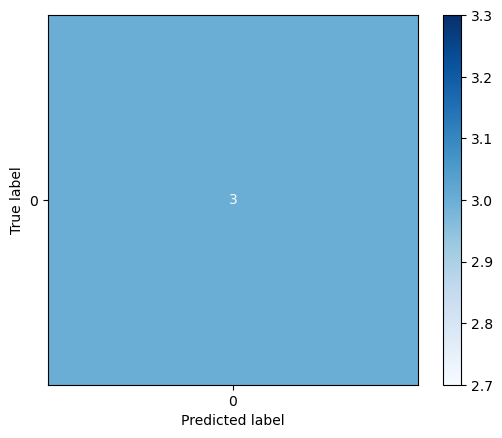

In [27]:
# Step 1: Fit the model with training data
rf_clf.fit(X_train_scaled, y_train)  # Ensure you fit the model first

# Step 2: Make predictions
y_pred = rf_clf.predict(X_test_scaled)

# Step 3: Evaluate performance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
